In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [31]:
def plot_data(data, model, title, plot_cuda=True):
    fig, axs = plt.subplots(1,1)
    plt.sca(axs)
    sns.lineplot(data=data.query(f"model == '{model}' & device == 'cpu'"),
                 x="batch_size", y="steps_per_second", hue="stepping_method",
                 palette="Blues")
    if plot_cuda:
        sns.lineplot(data=data.query(f"model == '{model}' & device == 'cuda'"),
                     x="batch_size", y="steps_per_second", hue="stepping_method", palette="Reds_r")
    plt.xscale("log")
    #plt.yscale("log")
    n_ticks = int(np.log2(data.batch_size.max())) + 1
    plt.xticks(2**np.arange(n_ticks).astype(int), 2**np.arange(n_ticks), rotation=45)
    plt.xticks([], minor=True)
    plt.ylabel("Steps / second")
    plt.xlabel("Batch size")
    plt.title(title)
    sns.despine()

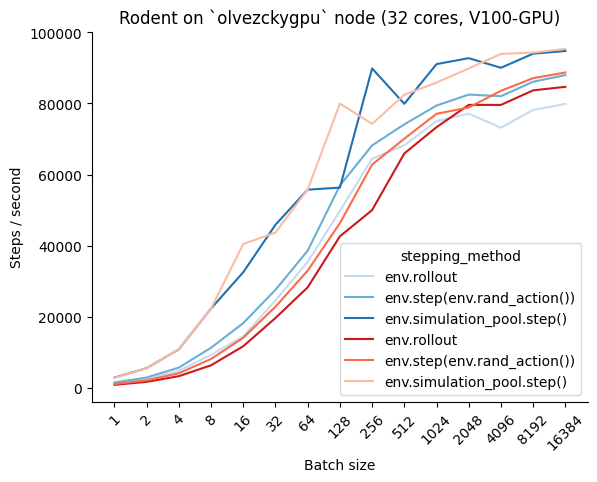

In [32]:
data = pd.read_csv("benchmark_results_olveczkygpu.csv", index_col=0)
title = "Rodent on `olvezckygpu` node (32 cores, V100-GPU)"
plot_data(data, "rodent.xml", title)
#plt.savefig("plots/rodent_olvezckygpu.svg", bbox_inches="tight")

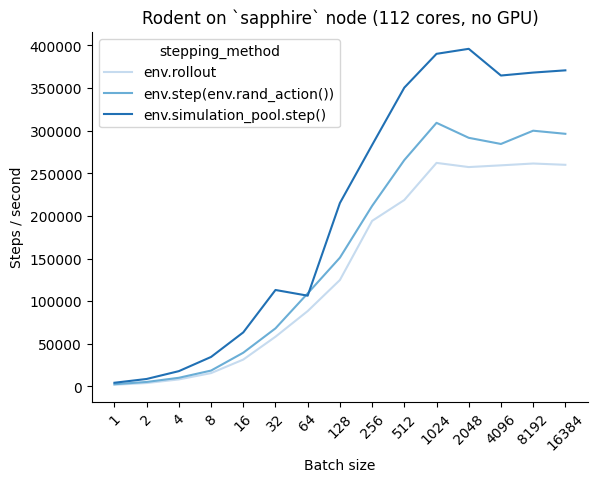

In [36]:
data = pd.read_csv("benchmark_results_sapphire.csv", index_col=0)
title = "Rodent on `sapphire` node (112 cores, no GPU)"
plot_data(data, "rodent.xml", title, plot_cuda=False)

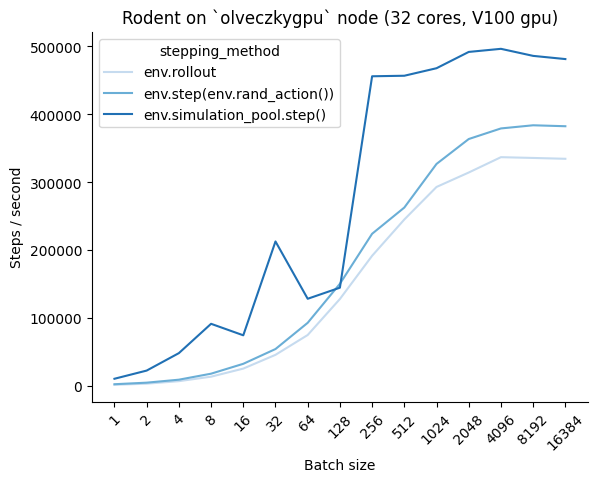

In [43]:
data = pd.read_csv("benchmark_results_olveczkygpu.csv", index_col=0)
title = "Rodent on `olveczkygpu` node (32 cores, V100 gpu)"
plot_data(data, "humanoid_mjx.xml", title, plot_cuda=False)